In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import scipy.interpolate as spi
import scipy.optimize as spo
import scipy.stats as sps
import altair as alt
import hysttools as ht
from pathlib import Path
from datetime import date

In [2]:
from altair_data_server import data_server
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
#repo=git.Repo('.', search_parent_directories=True)
path_root = Path(os.getcwd()).parent
data_folder = path_root / 'data'
processed_folder = data_folder / 'processed'
vsm_folder = data_folder / 'raw'/'vsm'
image_folder = data_folder / 'images'
search_pattern = re.compile('.*hysu$') # This is the suffix for a hysteresis file

file_list = list(filter(search_pattern.match,os.listdir(vsm_folder)))
specimens=pd.DataFrame(data={'name':file_list,'file':file_list})
specimens['name']=specimens['name'].str.replace('\.hysu','').str.lower()

location_names={'.*eg.*':'glacier','.*cb.*':'bay','.*combay.*':'bay','.*suspended.*':'suspended','.*bed.*':'bed'}
specimens['location']=specimens['name'].replace(location_names.keys(),location_names.values(),regex=True)

print(specimens)
print("\n{} HYSU files to process.".format(np.shape(specimens)[0]))

                      name                          file   location
0               2022cb0101               2022CB0101.hysu        bay
1               2022cb0103               2022CB0103.hysu        bay
2               2022eg0102               2022EG0102.hysu    glacier
3               2022eg0203               2022eg0203.hysu    glacier
4    2023pr01_bed_sediment    2023PR01_bed_sediment.hysu        bed
5  2023pr01_suspended_silt  2023PR01_suspended_silt.hysu  suspended
6    2023pr02_bed_sediment    2023PR02_bed_sediment.hysu        bed
7                 combay01                 Combay01.hysu        bay

8 HYSU files to process.


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
Hgrid=ht.make_hgrid(200,0.8,0.5)
Hgrid2=ht.make_hgrid2(200,0.8)
hyst_rh=pd.DataFrame(columns=['id']+["{}".format(x) for x in Hgrid])
hyst_ih=pd.DataFrame(columns=['id']+["{}".format(x) for x in Hgrid])
all_irm=pd.DataFrame(columns=['id','field','remanence','gradient'])

Working on 2022CB0101.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2022CB0101.hysu

Processing: 2022cb0101

Hysteresis file read with 1003 data points.
init_linear       field        moment
0  0.000055 -3.720364e-08
1  0.004968  5.200520e-06
2  0.010045  1.151512e-05
[0.00346703]


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Hysteresis file processed.
Working on 2022CB0103.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2022CB0103.hysu

Processing: 2022cb0103

Hysteresis file read with 1003 data points.
init_linear       field        moment
0  0.000055 -3.328416e-08
1  0.004960  4.770817e-06
2  0.010032  1.061243e-05
[0.00438662]
Hysteresis file processed.


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Working on 2022EG0102.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2022EG0102.hysu

Processing: 2022eg0102

Hysteresis file read with 1003 data points.
init_linear       field    moment
0  0.000050  0.000008
1  0.004984  0.000020
2  0.010060  0.000033
[0.00667793]


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Hysteresis file processed.
Working on 2022eg0203.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2022eg0203.hysu

Processing: 2022eg0203

Hysteresis file read with 1003 data points.
init_linear       field    moment
0  0.000035  0.000009
1  0.004960  0.000022
2  0.010024  0.000036
[0.00715998]


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Hysteresis file processed.
Working on 2023PR01_bed_sediment.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2023PR01_bed_sediment.hysu

Processing: 2023pr01_bed_sediment

Hysteresis file read with 1003 data points.
init_linear       field        moment
0  0.000051 -3.508670e-08
1  0.004960  2.582648e-06
2  0.010044  5.689450e-06
[0.00794368]
Hysteresis file processed.


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Working on 2023PR01_suspended_silt.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2023PR01_suspended_silt.hysu

Processing: 2023pr01_suspended_silt

Hysteresis file read with 1003 data points.
init_linear       field        moment
0  0.000052  3.568542e-07
1  0.004990  6.070464e-07
2  0.010065  8.726239e-07
[0.01062883]


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Hysteresis file processed.
Working on 2023PR02_bed_sediment.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\2023PR02_bed_sediment.hysu

Processing: 2023pr02_bed_sediment

Hysteresis file read with 1003 data points.
init_linear       field    moment
0  0.000058  0.000005
1  0.004997  0.000010
2  0.010054  0.000014
[0.00967383]


C:\Users\paselkin\anaconda3\envs\pmagpy_env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Hysteresis file processed.
Working on Combay01.hysu
C:\Users\paselkin\Dropbox\Research\Glaciers2Bay\glacier-bay-uwt-student-projects\data\raw\vsm\Combay01.hysu

Processing: combay01

Hysteresis file read with 1003 data points.
init_linear       field        moment
0  0.000038 -6.126274e-07
1  0.004975  7.939197e-06
2  0.010058  1.584637e-05
[-0.00972396]

Upper Hc:  0.002603778554400084
Hysteresis file processed.


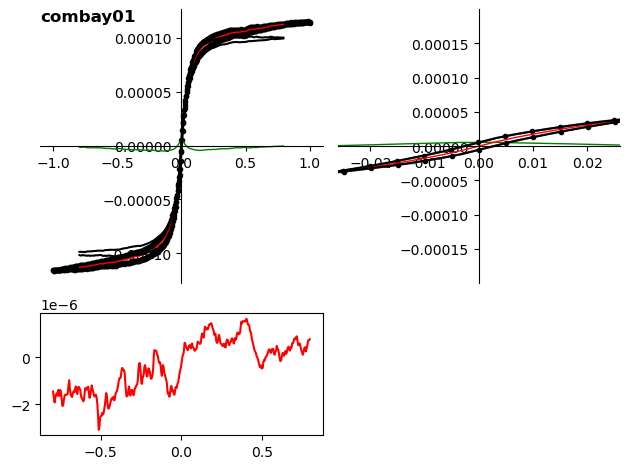

In [5]:
file_skip=[]
hyst_stats=pd.DataFrame(columns=['id','Mrs','Ms','Hc','Xhf','Q','Qeff'])

for index,row in specimens.iterrows():
    name,file_name,location = row
    file_path = vsm_folder / file_name
    print('Working on {}\n{}\n'.format(file_name,file_path))
    if (file_name in file_skip):
        print('Skipping... {}\n'.format(file_name))
    if (file_name not in file_skip):
        print("Processing: {}\n".format(name))
        s,d=ht.read_hyst(file_path)
        print("Hysteresis file read with {} data points.".format(d['moment'].shape[0]))
        result=ht.process_hyst(s,d,Hgrid=Hgrid)
        print("Hysteresis file processed.")
        fig=plt.figure(1)
        ax_tuple=ht.plot_hyst_report(result,fig,name)
        plt.savefig(image_folder/'{}_hystreport.svg'.format(name),dpi=300)
        plt.savefig(image_folder/'{}_hystreport.png'.format(name),dpi=300)
        to_add=pd.Series({'id':name,
                                        'Mrs':float(result['Mrs']),
                                        'Ms':float(result['Ms']),
                                        'Hc':float(result['Hc']),
                                        'Xinit':float(result['Xinit']),
                                        'Xhf':float(result['Xhf']),
                                        'Q':float(result['Q']),
                                        'Qeff':float(result['Qeff'])})
        hyst_stats=hyst_stats.append(to_add,ignore_index=True)
        to_add=pd.Series(dict(zip(["{}".format(x) for x in result['reversible']['field']],result['reversible']['moment'])))
        to_add['id']=name
        hyst_rh=hyst_rh.append(to_add,ignore_index=True)
        to_add=pd.Series(dict(zip(["{}".format(x) for x in result['irreversible']['field']],result['irreversible']['moment'])))
        to_add['id']=name
        hyst_ih=hyst_ih.append(to_add,ignore_index=True)
        

In [6]:
hyst_stats['MrsMs']=hyst_stats['Mrs']/hyst_stats['Ms']
dcd_stats=pd.read_csv(processed_folder/'dcd_stats.csv',index_col=0)
hyst_merge=pd.merge(hyst_stats,dcd_stats,on='id')
hyst_merge['HcrHc']=hyst_merge['Hcr']/hyst_merge['Hc']

location_names={'.*eg.*':'glacier','.*cb.*':'bay','.*combay.*':'bay','.*suspended.*':'suspended','.*bed.*':'bed'}
hyst_merge['location']=hyst_merge['id'].replace(location_names.keys(),location_names.values(),regex=True)

display(hyst_merge)

,id,Mrs,Ms,Hc,Xhf,Q,Qeff,Xinit,MrsMs,Hcr,SIRM,IRM_50mT,IRM_80mT,IRM_m80mT,IRM_100mT,IRM_300mT,max_d2,HcrHc,location
0,2022cb0101,1.323324e-05,0.000115,0.003467,1.863626e-05,4.973489,4.713144,0.001157,0.115217,0.005866,1.022862e-05,6.448912e-06,8.143377e-06,-8.278146e-06,8.819251e-06,1.011025e-05,596.654364,1.691937,bay
1,2022cb0103,1.139032e-05,0.000104,0.004387,1.880765e-05,4.556926,4.242220,0.001068,0.109334,0.004168,7.848765e-06,4.672135e-06,5.954848e-06,-5.692874e-06,6.440738e-06,7.568289e-06,2211.400481,0.950098,bay
2,2022eg0102,2.507290e-05,0.000203,0.006678,3.769855e-05,4.613937,4.274568,0.002508,0.123643,0.014530,2.048944e-05,1.240168e-05,1.577970e-05,-1.592828e-05,1.702561e-05,1.997928e-05,1510.502102,2.175777,glacier
3,2022eg0203,2.161842e-05,0.000223,0.007160,2.648754e-05,4.535558,4.341529,0.002673,0.096973,0.007960,1.806548e-05,1.138241e-05,1.382494e-05,-1.455229e-05,1.485010e-05,1.730091e-05,3966.519909,1.111773,glacier
4,2023pr01_bed_sediment,9.595095e-06,0.000066,0.007944,1.140537e-05,5.214535,5.011629,0.000573,0.145544,0.012770,7.792358e-06,4.483152e-06,5.897859e-06,-6.102204e-06,6.445100e-06,7.703192e-06,574.895711,1.607536,bed
5,2023pr01_suspended_silt,8.177911e-07,0.000005,0.010629,1.120205e-08,5.432576,5.136165,0.000052,0.167937,0.035330,8.010411e-07,4.093194e-07,5.864813e-07,-5.002058e-07,6.530586e-07,7.883953e-07,857.045504,3.324013,suspended
6,2023pr02_bed_sediment,1.328551e-05,0.000083,0.009674,1.442421e-05,5.753459,5.584026,0.000914,0.159573,0.028594,1.241570e-05,6.751574e-06,9.258543e-06,-8.438245e-06,1.018489e-05,1.213951e-05,597.677197,2.955782,bed
7,combay01,5.358436e-06,0.000100,0.002604,1.602890e-05,4.419636,4.440070,0.001642,0.053608,0.000305,8.564330e-06,5.154040e-06,6.564266e-06,-6.560867e-06,6.963481e-06,8.364688e-06,1113.101768,0.117028,bay
8,combay01,5.358436e-06,0.000100,0.002604,1.602890e-05,4.419636,4.440070,0.001642,0.053608,0.003343,3.052994e-06,1.158832e-06,1.625413e-06,-1.405656e-06,1.695955e-06,2.211249e-06,13521.932180,1.283797,bay


In [7]:
hyst_merge['SIRM_Xinit']=hyst_merge['SIRM']/hyst_merge['Xinit']
hyst_merge['IRM_50_100mT']=(hyst_merge['IRM_100mT']-hyst_merge['IRM_50mT'])/hyst_merge['SIRM']
hyst_merge['IRM_100_300mT']=(hyst_merge['IRM_300mT']-hyst_merge['IRM_100mT'])/hyst_merge['SIRM']
hyst_merge['IRM_300_SmT']=(hyst_merge['SIRM']-hyst_merge['IRM_300mT'])/hyst_merge['SIRM']
display(hyst_merge)

,id,Mrs,Ms,Hc,Xhf,Q,Qeff,Xinit,MrsMs,Hcr,...,IRM_m80mT,IRM_100mT,IRM_300mT,max_d2,HcrHc,location,SIRM_Xinit,IRM_50_100mT,IRM_100_300mT,IRM_300_SmT
0,2022cb0101,1.323324e-05,0.000115,0.003467,1.863626e-05,4.973489,4.713144,0.001157,0.115217,0.005866,...,-8.278146e-06,8.819251e-06,1.011025e-05,596.654364,1.691937,bay,0.008842,0.231736,0.126214,0.011573
1,2022cb0103,1.139032e-05,0.000104,0.004387,1.880765e-05,4.556926,4.242220,0.001068,0.109334,0.004168,...,-5.692874e-06,6.440738e-06,7.568289e-06,2211.400481,0.950098,bay,0.007352,0.225335,0.143660,0.035735
2,2022eg0102,2.507290e-05,0.000203,0.006678,3.769855e-05,4.613937,4.274568,0.002508,0.123643,0.014530,...,-1.592828e-05,1.702561e-05,1.997928e-05,1510.502102,2.175777,glacier,0.008168,0.225674,0.144156,0.024899
3,2022eg0203,2.161842e-05,0.000223,0.007160,2.648754e-05,4.535558,4.341529,0.002673,0.096973,0.007960,...,-1.455229e-05,1.485010e-05,1.730091e-05,3966.519909,1.111773,glacier,0.006758,0.191951,0.135663,0.042322
4,2023pr01_bed_sediment,9.595095e-06,0.000066,0.007944,1.140537e-05,5.214535,5.011629,0.000573,0.145544,0.012770,...,-6.102204e-06,6.445100e-06,7.703192e-06,574.895711,1.607536,bed,0.013596,0.251778,0.161452,0.011443
5,2023pr01_suspended_silt,8.177911e-07,0.000005,0.010629,1.120205e-08,5.432576,5.136165,0.000052,0.167937,0.035330,...,-5.002058e-07,6.530586e-07,7.883953e-07,857.045504,3.324013,suspended,0.015550,0.304278,0.168951,0.015787
6,2023pr02_bed_sediment,1.328551e-05,0.000083,0.009674,1.442421e-05,5.753459,5.584026,0.000914,0.159573,0.028594,...,-8.438245e-06,1.018489e-05,1.213951e-05,597.677197,2.955782,bed,0.013578,0.276530,0.157431,0.022245
7,combay01,5.358436e-06,0.000100,0.002604,1.602890e-05,4.419636,4.440070,0.001642,0.053608,0.000305,...,-6.560867e-06,6.963481e-06,8.364688e-06,1113.101768,0.117028,bay,0.005215,0.211276,0.163610,0.023311
8,combay01,5.358436e-06,0.000100,0.002604,1.602890e-05,4.419636,4.440070,0.001642,0.053608,0.003343,...,-1.405656e-06,1.695955e-06,2.211249e-06,13521.932180,1.283797,bay,0.001859,0.175933,0.168783,0.275711


In [8]:
hyst_merge.to_csv(processed_folder/'hyst_stats.csv')

In [10]:
hyst_fix=hyst_merge.copy().drop([8],axis=0)
hyst_chart=alt.Chart(hyst_fix).mark_point().encode(
    x=alt.X('Hc:Q'),
    y=alt.Y('MrsMs:Q'),
    size='Q:Q',
    color='Xhf:Q',
    tooltip='id:N'
).properties(
    width=300,
    height=300
).interactive()

hyst_data_text = alt.Chart(hyst_fix).mark_text(
    dx=12
).encode(
    x=alt.X('Hc:Q'),
    y=alt.Y('MrsMs:Q'),
    text='location'
)


day_chart=alt.Chart(hyst_fix).mark_point().encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrsMs:Q',scale=alt.Scale(type='log')),
    size='Q:Q',
    color='Xhf:Q',
    tooltip='id:N'
).properties(
    width=300,
    height=300
).interactive()

day_data_text = alt.Chart(hyst_fix).mark_text(
    dx=12
).encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrsMs:Q',scale=alt.Scale(type='log')),
    text='location'
)

day_sdmd1=alt.Chart(ht.dunlop_SDMD1).mark_line(color='lightgray').encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrMs:Q',scale=alt.Scale(type='log')),
    tooltip='soft_component'
)

day_sdmd2=alt.Chart(ht.dunlop_SDMD2).mark_line(color='lightgray').encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrMs:Q',scale=alt.Scale(type='log')),
    tooltip='soft_component'
)

day_sp10sd=alt.Chart(ht.dunlop_SP10SD).mark_line(color='lightgray').encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrMs:Q',scale=alt.Scale(type='log')),
    tooltip='soft_component'
)

day_sp15sd=alt.Chart(ht.dunlop_SP15SD).mark_line(color='lightgray').encode(
    x=alt.X('HcrHc:Q',scale=alt.Scale(type='log')),
    y=alt.Y('MrMs:Q',scale=alt.Scale(type='log')),
    tooltip='soft_component'
)

irm_chart=alt.Chart(hyst_fix).mark_point().encode(
    x=alt.X('IRM_100_300mT:Q'),
    y=alt.Y('SIRM_Xinit:Q'),
    size='Q:Q',
    color='Xhf:Q',
    tooltip='id:N'
).properties(
    width=300,
    height=300
).interactive()

irm_data_text = alt.Chart(hyst_fix).mark_text(
    dx=12
).encode(
    x=alt.X('IRM_100_300mT:Q'),
    y=alt.Y('SIRM_Xinit:Q'),
    text='location'
)

x_chart=alt.Chart(hyst_fix).mark_point().encode(
    x=alt.X('Xinit:Q'),
    y=alt.Y('Xhf:Q'),
    size='Q:Q',
    color='Xhf:Q',
    tooltip='id:N'
).properties(
    width=300,
    height=300
).interactive()

x_data_text = alt.Chart(hyst_fix).mark_text(
    dx=12
).encode(
    x=alt.X('Xinit:Q'),
    y=alt.Y('Xhf:Q'),
    text='location'
)

soft_hard_chart=alt.Chart(hyst_fix).mark_point().encode(
    x=alt.X('IRM_50_100mT:Q',scale=alt.Scale(zero=False)),
    y=alt.Y('IRM_100_300mT:Q',scale=alt.Scale(zero=False)),
    size='Q:Q',
    color='Xhf:Q',
    tooltip='id:N'
).properties(
    width=300,
    height=300
).interactive()

soft_hard_data_text = alt.Chart(hyst_fix).mark_text(
    dx=12
).encode(
    x=alt.X('IRM_50_100mT:Q',scale=alt.Scale(zero=False)),
    y=alt.Y('IRM_100_300mT:Q',scale=alt.Scale(zero=False)),
    text='location'
)
display((hyst_chart+hyst_data_text)|(day_chart+day_data_text+day_sdmd1+day_sdmd2+day_sp10sd+day_sp15sd)|
        (irm_chart+irm_data_text)|(x_chart+x_data_text)|(soft_hard_chart+soft_hard_data_text))

alt.HConcatChart(...)